In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Admission_Predict_A3.csv')
print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [6]:
data.fillna(data.mean(), inplace=True)

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
data.columns = data.columns.str.strip()

features = data.drop('Chance of Admit', axis=1)
target = data['Chance of Admit']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=60)

In [8]:
import seaborn as sns

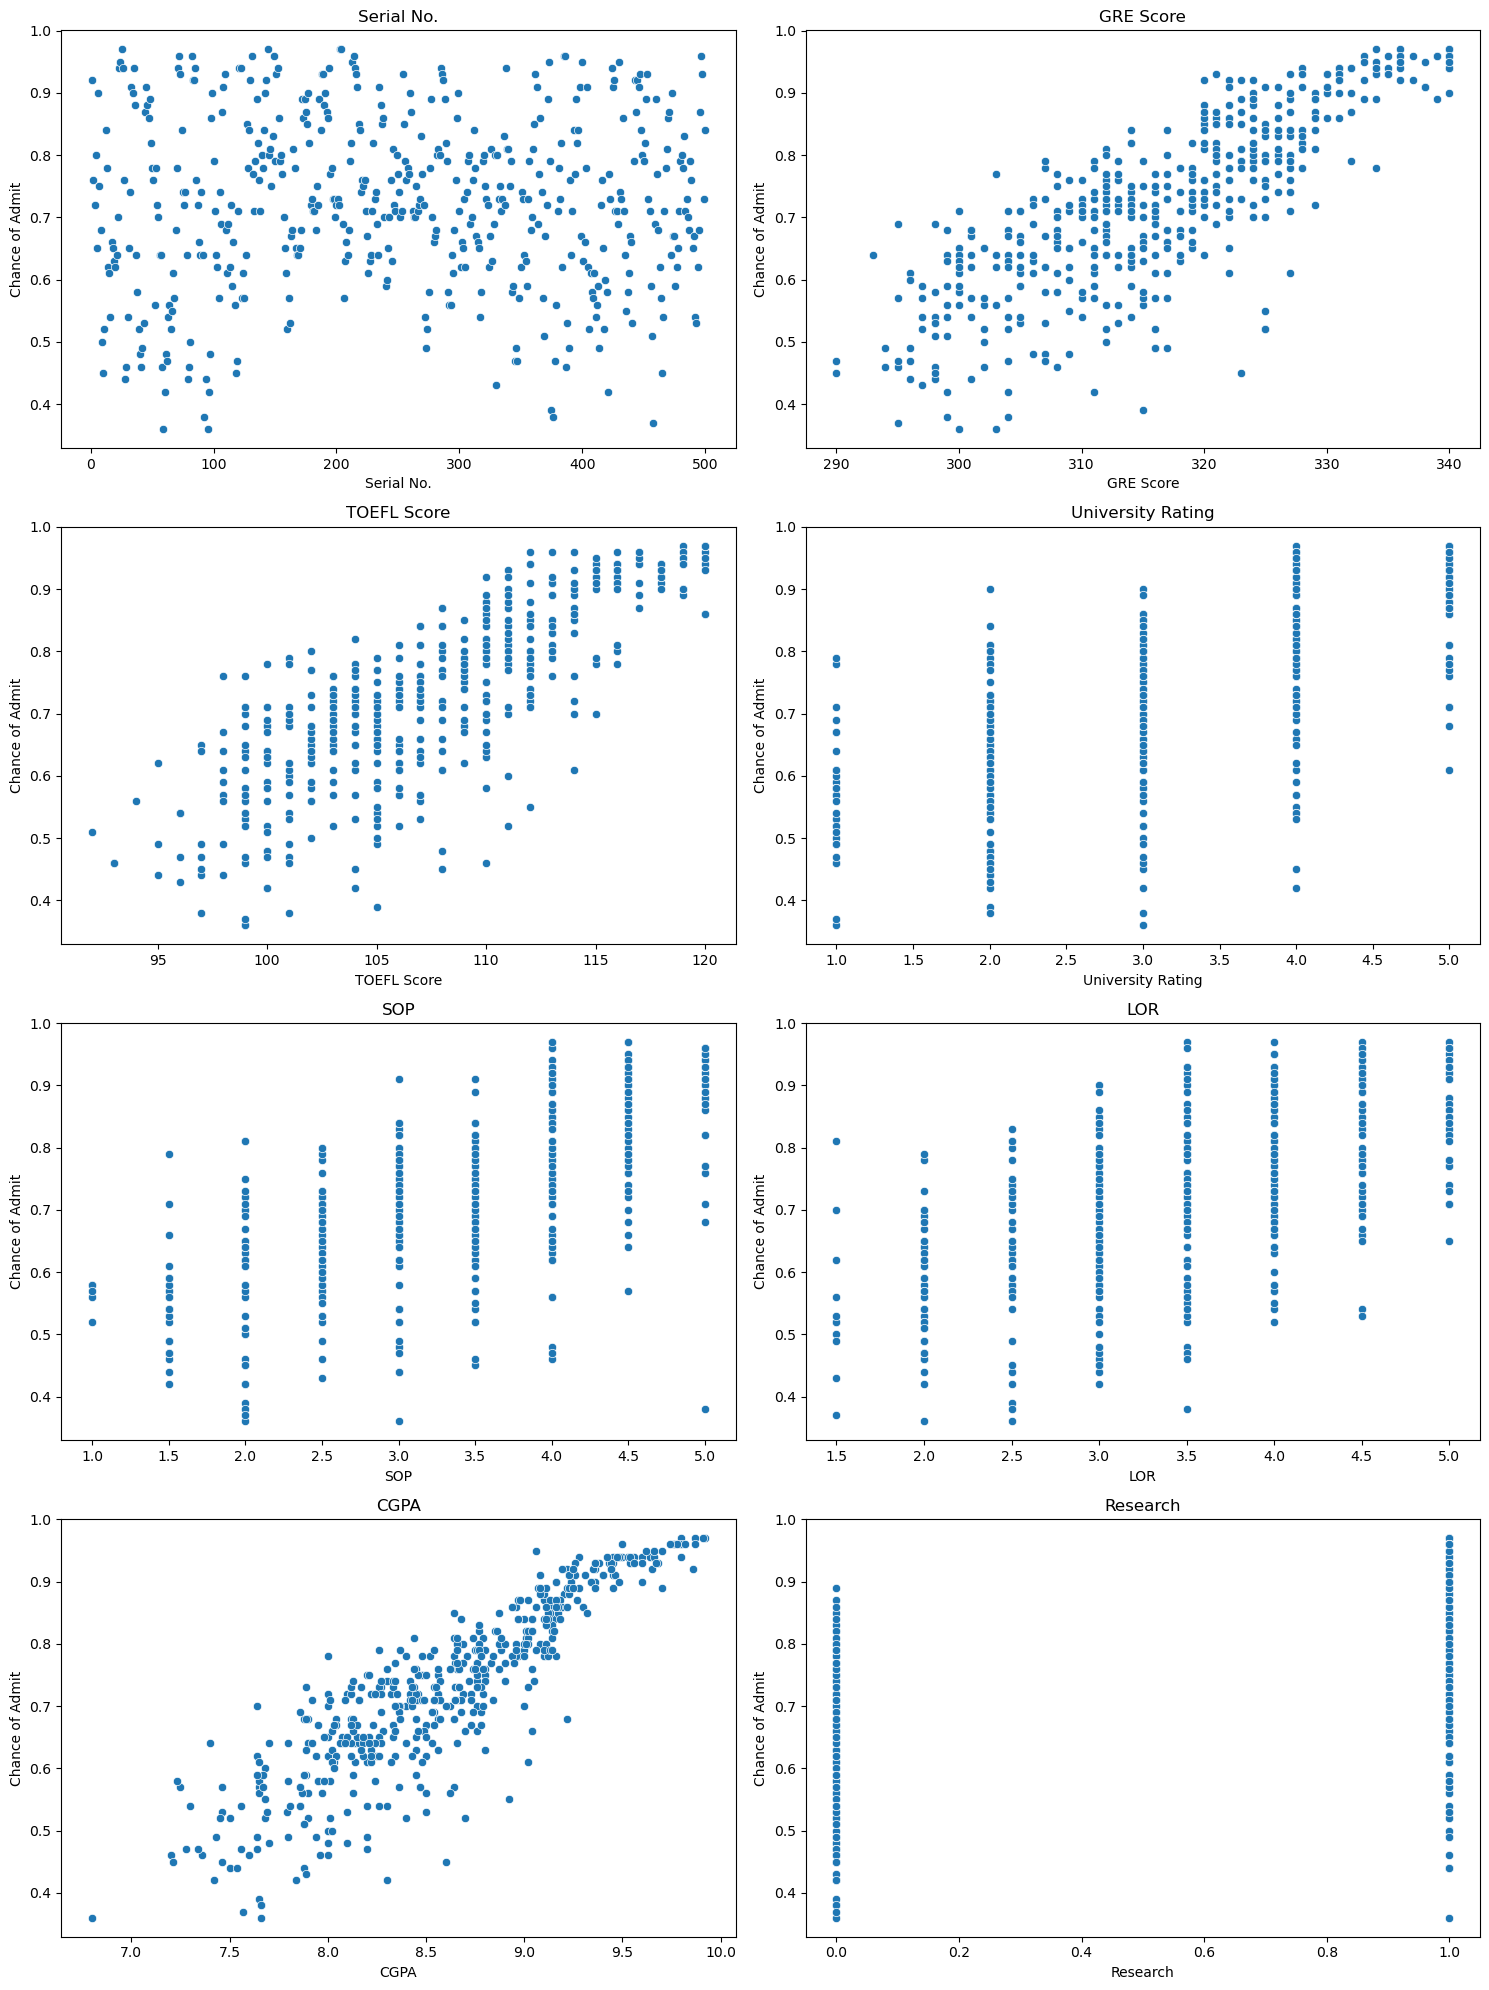

In [9]:
features = data.columns.drop('Chance of Admit')

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=data, x=feature, y='Chance of Admit')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Chance of Admit')

plt.tight_layout()
plt.show()


*   Linear Relationship: GRE Score, TOEFL Score, CGPA
*   Loosely Linear: SOP, LOR, University Rating


---

We observed that the target variable is almost of linear relationship with most features, which appear to be bounded well, therefore we use MinMax Scaler


In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

features = data.drop('Chance of Admit', axis=1)
target = data['Chance of Admit']

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Chance of Admit'] = target.values


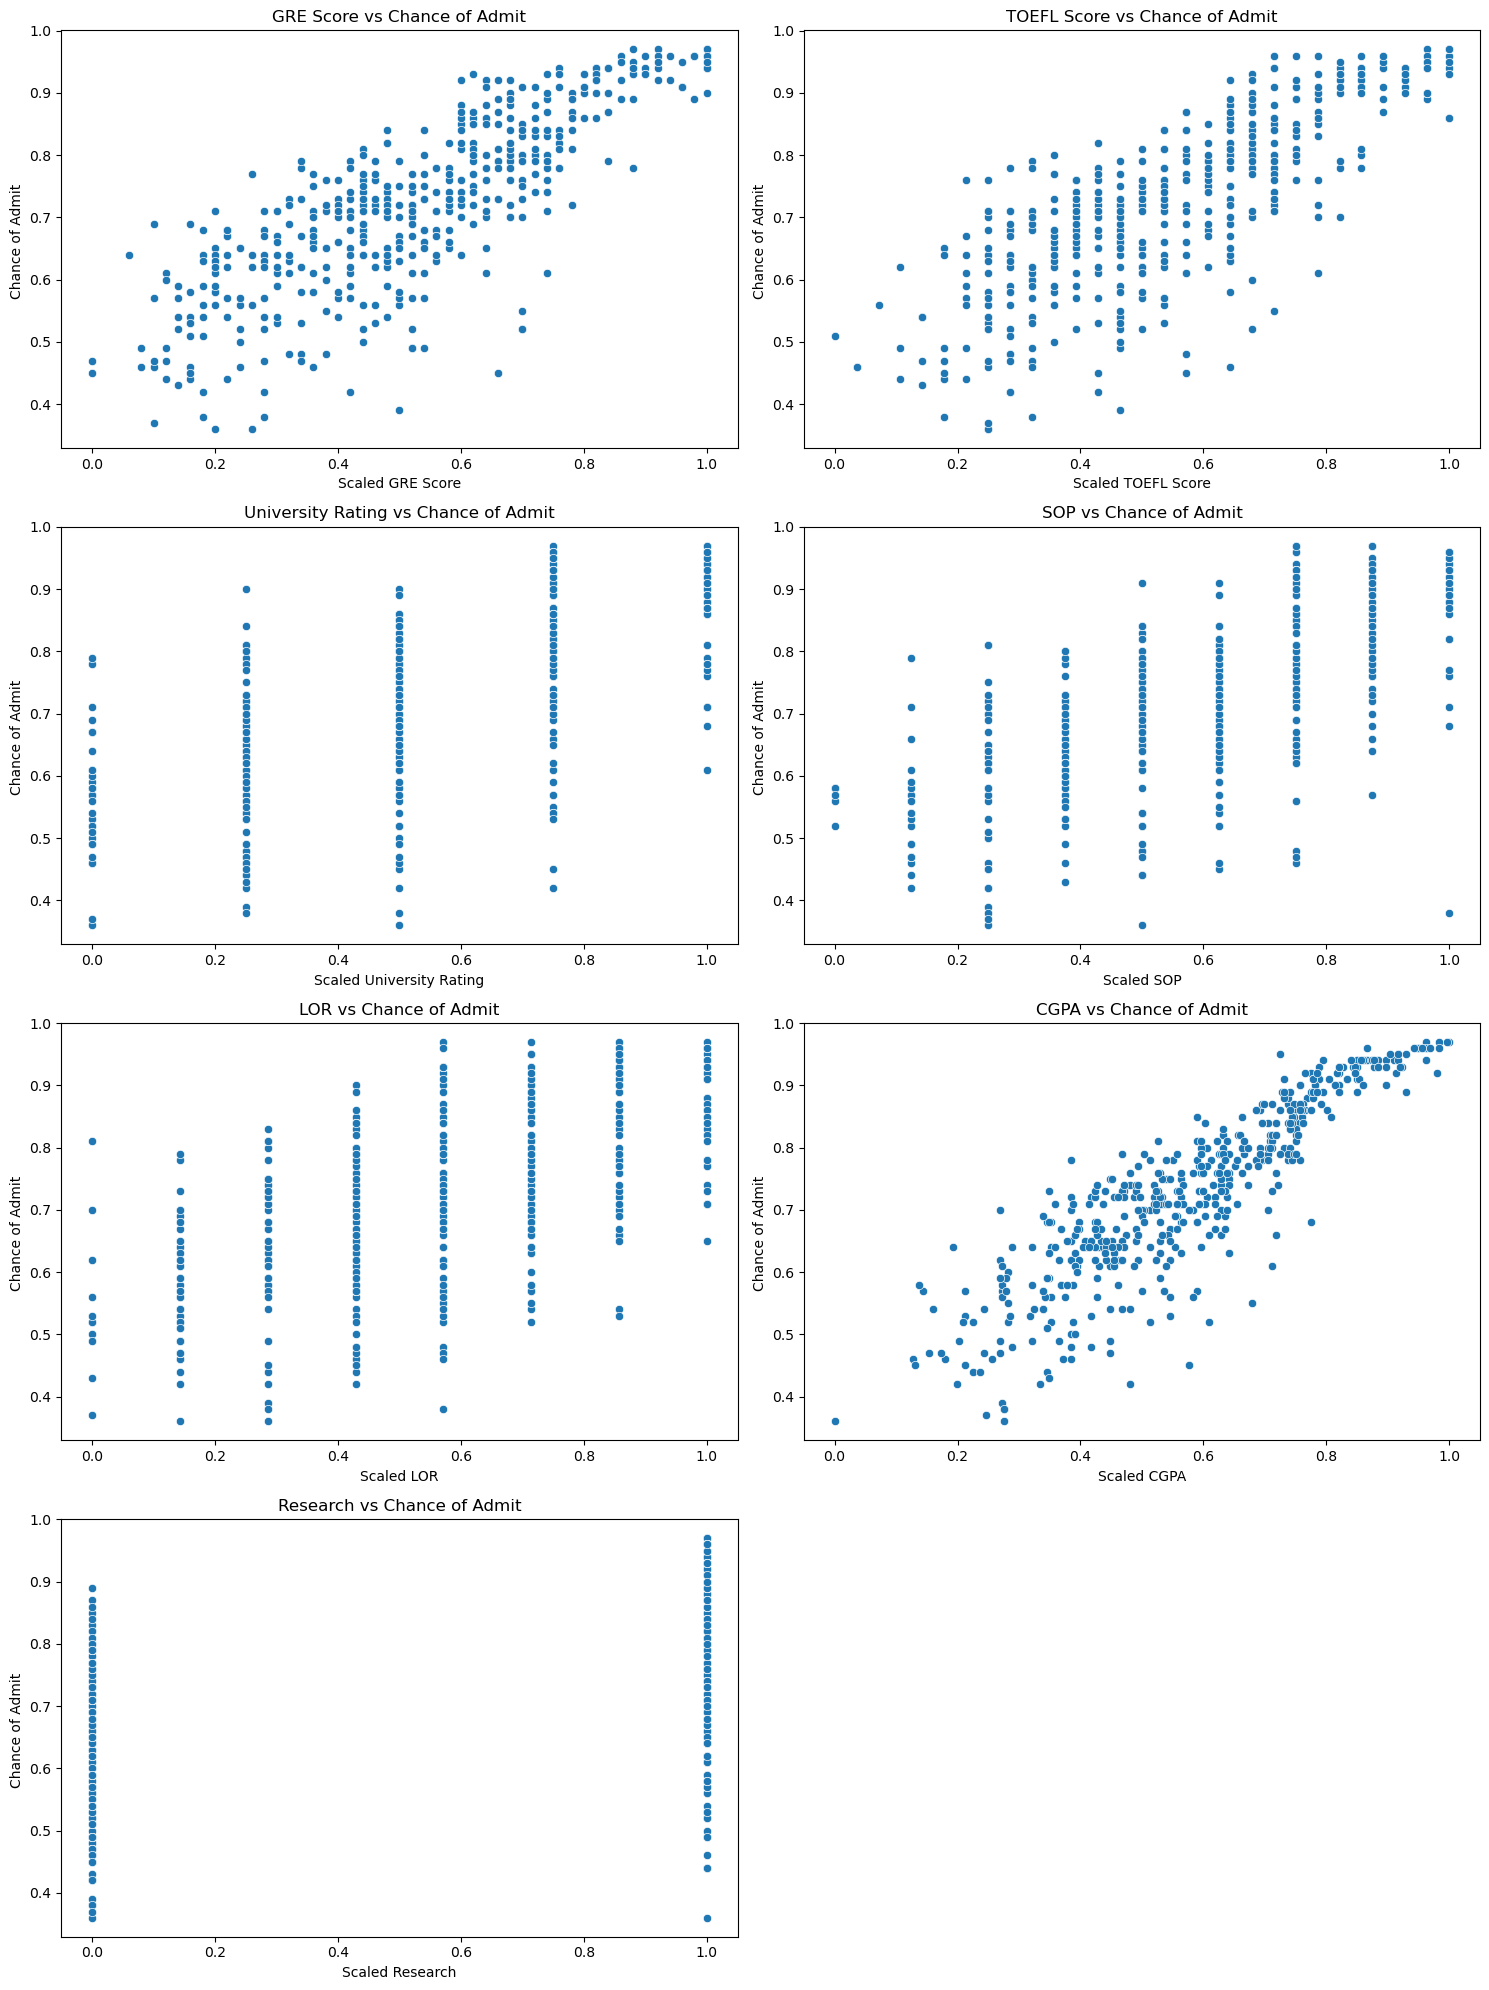

In [11]:
scaled_features_columns = scaled_data.columns.drop('Chance of Admit')

plt.figure(figsize=(15, 20))

for i, feature in enumerate(scaled_features_columns, 1):
    if(i==1): continue;
    plt.subplot(4, 2, i-1)
    sns.scatterplot(x=scaled_data[feature], y=scaled_data['Chance of Admit'])
    plt.title(f'{feature} vs Chance of Admit')
    plt.xlabel(f'Scaled {feature}')
    plt.ylabel('Chance of Admit ')

plt.tight_layout()
plt.show()


In [12]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features.columns)

X_train_scaled_df['Chance of Admit '] = y_train.values
X_test_scaled_df['Chance of Admit '] = y_test.values

print(X_train_scaled_df.head())
print(X_test_scaled_df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating    SOP       LOR  \
0    0.965932       0.76     0.750000               0.75  0.750  0.285714   
1    0.302605       0.84     0.857143               1.00  1.000  1.000000   
2    0.849699       0.70     0.785714               1.00  0.750  1.000000   
3    0.494990       0.42     0.428571               0.25  0.375  0.571429   
4    0.020040       0.70     0.500000               0.50  0.625  0.714286   

       CGPA  Research  Chance of Admit   
0  0.631410       1.0              0.83  
1  0.794872       1.0              0.94  
2  0.852564       1.0              0.91  
3  0.538462       0.0              0.71  
4  0.512821       1.0              0.52  
   Serial No.  GRE Score  TOEFL Score  University Rating    SOP       LOR  \
0    0.697395       0.24     0.250000               0.00  0.250  0.142857   
1    0.687375       0.30     0.392857               0.25  0.375  0.571429   
2    0.891784       0.76     0.857143               1.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
import pandas as pd

bins = [0, 0.6, 0.8, 1.0]
labels = ['Low', 'Medium', 'High']
X_train_scaled_df['Admit Category'] = pd.cut(X_train_scaled_df['Chance of Admit '], bins=bins, labels=labels)

print(X_train_scaled_df['Admit Category'].value_counts())

X_test_scaled_df['Admit Category'] = pd.cut(X_test_scaled_df['Chance of Admit '], bins=bins, labels=labels)

print(X_test_scaled_df['Admit Category'].value_counts())

Admit Category
Medium    213
High      112
Low        72
Name: count, dtype: int64
Admit Category
Medium    48
High      30
Low       22
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

X_train = X_train_scaled_df.drop(columns=['Chance of Admit ', 'Admit Category'])
y_train = X_train_scaled_df['Admit Category']
X_test = X_test_scaled_df.drop(columns=['Chance of Admit ', 'Admit Category'])
y_test = X_test_scaled_df['Admit Category']


In [16]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)

X_test_lda = lda.transform(X_test)

lda_train_data = pd.DataFrame(data=X_train_lda, columns=['LD1', 'LD2'])
lda_test_data = pd.DataFrame(data=X_test_lda, columns=['LD1', 'LD2'])

print("LDA-transformed Training Data:")
print(lda_train_data.head())

LDA-transformed Training Data:
        LD1       LD2
0 -1.431037 -0.049298
1 -2.746951 -0.337851
2 -2.962148 -0.635733
3  1.035808  0.589296
4  0.375950 -0.017519


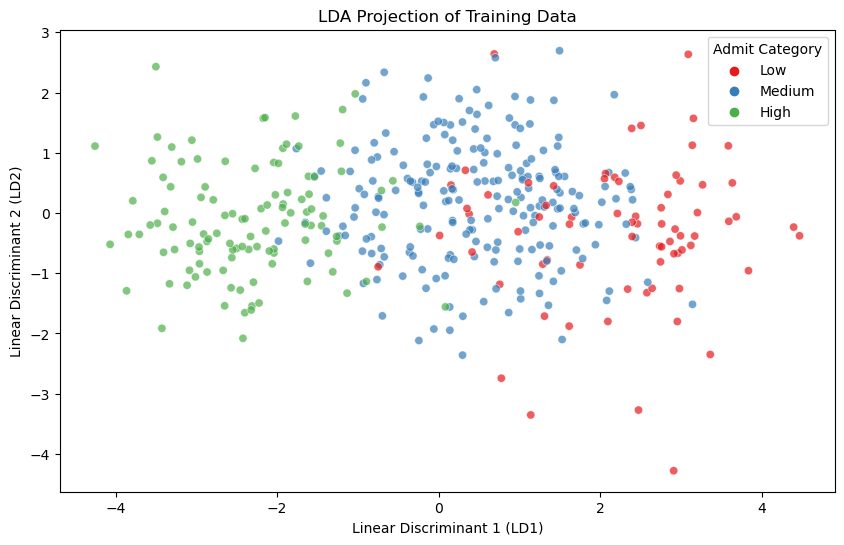

In [17]:
lda_train_data['Admit Category'] = y_train.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_train_data, x='LD1', y='LD2', hue='Admit Category', palette='Set1', alpha=0.7)
plt.title('LDA Projection of Training Data')
plt.xlabel('Linear Discriminant 1 (LD1)')
plt.ylabel('Linear Discriminant 2 (LD2)')
plt.legend(title='Admit Category')
plt.show()

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

X_train_tf = tf.convert_to_tensor(lda_train_data[['LD1', 'LD2']].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(X_train_scaled_df['Chance of Admit '].values, dtype=tf.float32)

weights = tf.Variable(tf.random.normal([2, 1]))
bias = tf.Variable(tf.random.normal([1]))

def linear_regression(X):
    return tf.matmul(X, weights) + bias

def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.01) #lesser training time, good results 

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tf)
        loss = mean_squared_error(y_train_tf, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 3.5227901935577393
Epoch 100, Loss: 0.04945790395140648
Epoch 200, Loss: 0.019353164359927177
Epoch 300, Loss: 0.0188282523304224
Epoch 400, Loss: 0.018819091841578484
Epoch 500, Loss: 0.01881893165409565
Epoch 600, Loss: 0.01881892792880535
Epoch 700, Loss: 0.018818926066160202
Epoch 800, Loss: 0.0188189297914505
Epoch 900, Loss: 0.0188189297914505


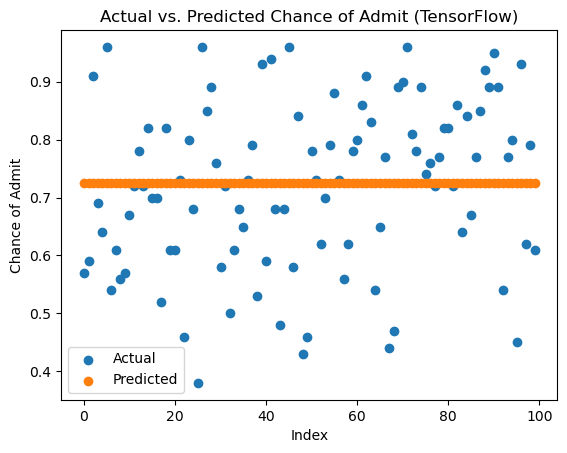

In [19]:
X_test_tf = tf.convert_to_tensor(lda_test_data[['LD1', 'LD2']].values, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(X_test_scaled_df['Chance of Admit '].values, dtype=tf.float32)
predictions_test = linear_regression(X_test_tf)

plt.scatter(range(len(y_test_tf)), y_test_tf, label='Actual')
plt.scatter(range(len(y_test_tf)), predictions_test.numpy(), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Chance of Admit (TensorFlow)')
plt.xlabel('Index')
plt.ylabel('Chance of Admit')
plt.show()

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

X_train_tf = tf.convert_to_tensor(lda_train_data[['LD1', 'LD2']].values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(X_train_scaled_df['Chance of Admit '].values, dtype=tf.float32)

weights = tf.Variable(tf.random.normal([2, 1]))
bias = tf.Variable(tf.random.normal([1]))

def linear_regression(X):
    return tf.matmul(X, weights) + bias

def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.Adam(learning_rate=0.01) #lesser training time, good results 

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tf)
        loss = mean_squared_error(y_train_tf, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.numpy()}')

Epoch 0, Loss: 4.612179279327393
Epoch 100, Loss: 0.2512986660003662
Epoch 200, Loss: 0.020223695784807205
Epoch 300, Loss: 0.01881936751306057
Epoch 400, Loss: 0.01881892792880535
Epoch 500, Loss: 0.018818924203515053
Epoch 600, Loss: 0.018818924203515053
Epoch 700, Loss: 0.018818924203515053
Epoch 800, Loss: 0.018818924203515053
Epoch 900, Loss: 0.018818924203515053


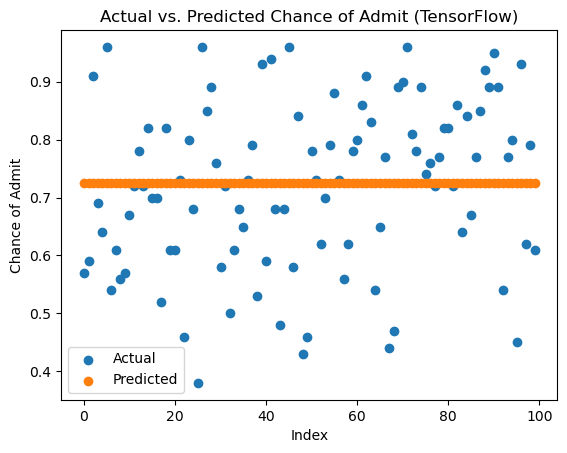

In [21]:
X_test_tf = tf.convert_to_tensor(lda_test_data[['LD1', 'LD2']].values, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(X_test_scaled_df['Chance of Admit '].values, dtype=tf.float32)
predictions_test = linear_regression(X_test_tf)

plt.scatter(range(len(y_test_tf)), y_test_tf, label='Actual')
plt.scatter(range(len(y_test_tf)), predictions_test.numpy(), label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Chance of Admit (TensorFlow)')
plt.xlabel('Index')
plt.ylabel('Chance of Admit')
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(lda_train_data[['LDA1', 'LDA2']], X_train_scaled_df['Chance of Admit '])

y_pred_test = reg_model.predict(lda_test_data[['LDA1', 'LDA2']])

plt.scatter(range(len(X_test_scaled_df['Chance of Admit '])), X_test_scaled_df['Chance of Admit '], label='Actual')
plt.scatter(range(len(y_pred_test)), y_pred_test, label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Chance of Admit (Scikit-Learn)')
plt.xlabel('Index')
plt.ylabel('Chance of Admit')
plt.show()

KeyError: "None of [Index(['LDA1', 'LDA2'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf

data = pd.read_csv('Admission_Predict_A3.csv')

print("Missing values in each column:")
print(data.isnull().sum())

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

bins = [0, 0.6, 0.8, 1.0]
labels = ['Low', 'Medium', 'High']
data['Admit Category'] = pd.cut(data['Chance of Admit '], bins=bins, labels=labels)

X = data.drop(columns=['Chance of Admit ', 'Admit Category', 'Serial No.'])
y = data['Admit Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Low', 'Medium', 'High']))

y_test_one_hot_log_reg = pd.get_dummies(y_test)
log_reg_auc_roc = roc_auc_score(y_test_one_hot_log_reg, pd.get_dummies(y_pred_log_reg), multi_class='ovr')
print(f"Logistic Regression AUC-ROC Score: {log_reg_auc_roc:.2f}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['Low', 'Medium', 'High']))

y_test_one_hot_rf = pd.get_dummies(y_test)
rf_auc_roc = roc_auc_score(y_test_one_hot_rf, pd.get_dummies(rf_pred), multi_class='ovr')
print(f"Random Forest AUC-ROC Score: {rf_auc_roc:.2f}")

X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(pd.get_dummies(y_train).values, dtype=tf.float32)

input_dim = X_train_scaled.shape[1]
output_dim = y_train_tf.shape[1]
weights = tf.Variable(tf.random.normal([input_dim, output_dim]), name='weights')
biases = tf.Variable(tf.random.normal([output_dim]), name='biases')

def model(X):
    return tf.matmul(X, weights) + biases

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred_tf = model(X_train_tf)
        loss = loss_fn(y_train_tf, y_pred_tf)
    gradients = tape.gradient(loss, [weights, biases])
    optimizer.apply_gradients(zip(gradients, [weights, biases]))
    if (epoch + 1) % 100 == 0:
        print(f"Epoch: {epoch + 1}, Loss: {loss.numpy():.4f}")

y_test_tf = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_pred_tf = tf.argmax(model(y_test_tf), axis=1).numpy()

y_pred_tf_labels = np.array(['Low', 'Medium', 'High'])[y_pred_tf]

print("TensorFlow Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_tf_labels, target_names=['Low', 'Medium', 'High']))

tf_auc_roc = roc_auc_score(y_test_one_hot_log_reg, pd.get_dummies(y_pred_tf_labels), multi_class='ovr')
print(f"TensorFlow Logistic Regression AUC-ROC Score: {tf_auc_roc:.2f}")


Missing values in each column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.76      0.81        29
      Medium       0.92      0.63      0.75        19
        High       0.77      0.92      0.84        52

    accuracy                           0.82       100
   macro avg       0.86      0.77      0.80       100
weighted avg       0.83      0.82      0.82       100

Logistic Regression AUC-ROC Score: 0.32
Random Forest Classification Report:
              precision    recall  f1-score   support

         Low       0.87      0.69      0.77        29
      Medium       0.92      0.58      0.71        19
        High       0.74      0.92      0.82        52

    accuracy                  

In [26]:
import time

In [112]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]
results = []

for lr in learning_rates:
    start_time = time.time()

    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1/lr, random_state=42)

    log_reg.fit(X_train_scaled, y_train)

    y_pred_log_reg = log_reg.predict(X_test_scaled)

    accuracy = log_reg.score(X_test_scaled, y_test)

    loss = -log_reg.score(X_test_scaled, y_test)

    elapsed_time = time.time() - start_time
    results.append((lr, accuracy, loss, elapsed_time))

print("\nResults of different learning rates:")
for lr, acc, loss, elapsed in results:
    print(f"Learning Rate: {lr}, Accuracy: {acc:.4f}, Loss: {loss:.4f}, Time: {elapsed:.4f} seconds")


Results of different learning rates:
Learning Rate: 1e-05, Accuracy: 0.8000, Loss: -0.8000, Time: 0.0321 seconds
Learning Rate: 0.0001, Accuracy: 0.8000, Loss: -0.8000, Time: 0.0191 seconds
Learning Rate: 0.001, Accuracy: 0.8000, Loss: -0.8000, Time: 0.0181 seconds
Learning Rate: 0.01, Accuracy: 0.8000, Loss: -0.8000, Time: 0.0185 seconds
Learning Rate: 0.1, Accuracy: 0.8000, Loss: -0.8000, Time: 0.0181 seconds
Learning Rate: 1.0, Accuracy: 0.8200, Loss: -0.8200, Time: 0.0356 seconds
Learning Rate: 10, Accuracy: 0.7900, Loss: -0.7900, Time: 0.0135 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters for Random Forest: {grid_search.best_params_}")
print(f"Best score for Random Forest: {grid_search.best_score_:.4f}")

best_rf_model = grid_search.best_estimator_
rf_pred = best_rf_model.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=['Low', 'Medium', 'High']))

y_test_one_hot_rf = pd.get_dummies(y_test)
rf_auc_roc = roc_auc_score(y_test_one_hot_rf, pd.get_dummies(rf_pred), multi_class='ovr')
print(f"Random Forest AUC-ROC Score: {rf_auc_roc:.2f}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.8564
Random Forest Classification Report:
              precision    recall  f1-score   support

         Low       0.86      0.66      0.75        29
      Medium       0.92      0.58      0.71        19
        High       0.73      0.92      0.81        52

    accuracy                           0.78       100
   macro avg       0.84      0.72      0.76       100
weighted avg       0.80      0.78      0.77       100

Random Forest AUC-ROC Score: 0.35


In [117]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [119]:
X = data.drop(columns=['Chance of Admit ', 'Admit Category'])
y = data['Admit Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [120]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg_scores = cross_val_score(log_reg, X_scaled, y, cv=kfold, scoring='accuracy')

print(f"Logistic Regression - Cross-Validated Accuracy: {np.mean(log_reg_scores):.4f} ± {np.std(log_reg_scores):.4f}")

Logistic Regression - Cross-Validated Accuracy: 0.8191 ± 0.0586


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [121]:
log_reg.fit(X_scaled, y)
y_pred_log_reg = log_reg.predict(X_scaled)

print("Logistic Regression Classification Report:")
print(classification_report(y, y_pred_log_reg, target_names=['Low', 'Medium', 'High']))

y_one_hot_log_reg = pd.get_dummies(y)
log_reg_auc_roc = roc_auc_score(y_one_hot_log_reg, pd.get_dummies(y_pred_log_reg), multi_class='ovr')
print(f"Logistic Regression AUC-ROC Score: {log_reg_auc_roc:.2f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         Low       0.90      0.89      0.90       142
      Medium       0.78      0.62      0.69        94
        High       0.82      0.89      0.85       261

    accuracy                           0.84       497
   macro avg       0.83      0.80      0.81       497
weighted avg       0.84      0.84      0.83       497

Logistic Regression AUC-ROC Score: 0.30


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [122]:
rf_model.fit(X_scaled, y)
rf_pred = rf_model.predict(X_scaled)

print("Random Forest Classification Report:")
print(classification_report(y, rf_pred, target_names=['Low', 'Medium', 'High']))

y_one_hot_rf = pd.get_dummies(y)
rf_auc_roc = roc_auc_score(y_one_hot_rf, pd.get_dummies(rf_pred), multi_class='ovr')
print(f"Random Forest AUC-ROC Score: {rf_auc_roc:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       142
      Medium       1.00      1.00      1.00        94
        High       1.00      1.00      1.00       261

    accuracy                           1.00       497
   macro avg       1.00      1.00      1.00       497
weighted avg       1.00      1.00      1.00       497

Random Forest AUC-ROC Score: 0.25


The dataset has no missing values in any of its columns, indicating that all entries are complete. The performance of different classification models was evaluated, starting with logistic regression, which yielded a classification report showing precision, recall, and F1-scores for three categories: Low, Medium, and High.

The model achieved an overall accuracy of 82% with an AUC-ROC score of 0.32. Following this, a random forest classifier was assessed, reporting a similar classification report with an accuracy of 79% and an AUC-ROC score of 0.34. The training process of a TensorFlow logistic regression model was detailed, indicating a progressive decrease in loss over 1000 epochs, culminating in a classification report with an accuracy of 70% and an AUC-ROC score of 0.35.

The impact of different learning rates on the logistic regression model was explored, producing results that varied slightly across rates, with accuracy peaking at 82% for a learning rate of 1.0. A grid search was conducted for the random forest model, resulting in the best parameters being a maximum depth of 10, a square root maximum feature, and 200 estimators, with a best score of 85.64%.

 The classification report from this model reflected an accuracy of 78%. Furthermore, the models were subjected to cross-validation, with logistic regression achieving a cross-validated accuracy of 81.91%, indicating a consistent performance across different folds. The results highlight the comparative effectiveness of the models and the importance of hyperparameter tuning in achieving optimal performance.
